In [1]:
# Importing the necessary libraries
import sys
import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model
from keras.datasets import cifar10 #The dataset comes built-in from keras.datasets
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

In [2]:
# Load the training and testing dataset
def load_dataset():
    (trainX, trainY), (testX, testY) = cifar10.load_data()
    
    # Selecting only the first 3 labels i.e. 0 - aeroplane, 1 - automobile, 2 - bird
    trainX = np.delete(trainX, np.where(trainY > 2), axis=0)
    trainY = np.delete(trainY, np.where(trainY > 2), axis=0)
    testX = np.delete(testX, np.where(testY > 2), axis=0)
    testY = np.delete(testY, np.where(testY > 2), axis=0)
    
    # Flattening the training and testing images into a single vector (i.e. from 3D to 1D)
    trainX = trainX.reshape(trainX.shape[0], trainX.shape[1]*trainX.shape[2]*trainX.shape[3])
    testX = testX.reshape(testX.shape[0], testX.shape[1]*testX.shape[2]*testX.shape[3])
    
    # Converting from integers to floating numbers.
    # The data is loaded as integers, so we must make it float point values in order to perform the division for normalisation.
    trainX = trainX.astype('float32')
    testX = testX.astype('float32')
    
    # Normalizing the pixel intensities to range 0-1 by dividing each value by the maximum observation which is 255
    trainX /= 255
    testX /= 255
    
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)

    return trainX, trainY, testX, testY


# Defining the sequencial model
def define_model():
    model = Sequential()
    model.add(Dense(256, activation='relu', input_dim=32*32*3))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    
    # A logarithmic loss function is used with the stochastic gradient descent (SGD) optimization algorithm configured 
    # with a large momentum and weight decay with a learning rate of 0.001.
    sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['acc']) # Check with metrics=['mae']
    return model


# Plotting the training and validation loss
def plotLosses(history):
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(train_loss)+1)
    plt.plot(epochs, train_loss, 'kx', label='Training Loss')    # Black color
    plt.plot(epochs, val_loss, 'rx', label='Validation Loss')     # Red color
    plt.title('Training and Validation loss')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend(loc='upper left')
    plt.savefig('train_loss.png')
    plt.show()

    
# Plotting the training and validation accuracies
def plotAccs(history):
    train_acc = history.history['acc']
    val_acc = history.history['val_acc']
    epochs = range(1, len(train_acc)+1)
    plt.plot(epochs, train_acc, 'kx', label='Training Accuracy')    # Black color
    plt.plot(epochs, val_acc, 'rx', label='Validation Accuracy')     # Red color
    plt.title('Training and Validation Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(loc='upper left')
    plt.savefig('train_acc.png')
    plt.show()

In [3]:
# Buildingt the program and running the model
def run_model():
    trainX, trainY, testX, testY = load_dataset()
    
    # Defining the model
    model = define_model()
    
    # Validation_split: float (0 < x < 1). Fraction of the data to use as held-out validation data.
    history = model.fit(trainX, trainY, epochs=200, batch_size=512, validation_split=0.3)
    
    # Learning curves
    plotLosses(history)
    plotAccs(history)
    
    #Saving the model
    model.save('cifar10_model.h5')

Epoch 1/200
21/21 [==============================] - 1s 29ms/step - loss: 1.0836 - acc: 0.3882 - val_loss: 0.9944 - val_acc: 0.5847
Epoch 2/200
21/21 [==============================] - 0s 10ms/step - loss: 0.9632 - acc: 0.6045 - val_loss: 0.9181 - val_acc: 0.6333
Epoch 3/200
21/21 [==============================] - 0s 9ms/step - loss: 0.8955 - acc: 0.6519 - val_loss: 0.8707 - val_acc: 0.6524
Epoch 4/200
21/21 [==============================] - 0s 10ms/step - loss: 0.8430 - acc: 0.6748 - val_loss: 0.8389 - val_acc: 0.6720
Epoch 5/200
21/21 [==============================] - 0s 11ms/step - loss: 0.8131 - acc: 0.6786 - val_loss: 0.8126 - val_acc: 0.6771
Epoch 6/200
21/21 [==============================] - 0s 10ms/step - loss: 0.7861 - acc: 0.6920 - val_loss: 0.7987 - val_acc: 0.6856
Epoch 7/200
21/21 [==============================] - 0s 11ms/step - loss: 0.7631 - acc: 0.7053 - val_loss: 0.7829 - val_acc: 0.6920
Epoch 8/200
21/21 [==============================] - 0s 12ms/step - loss: 0.7

Epoch 63/200
21/21 [==============================] - 0s 10ms/step - loss: 0.5356 - acc: 0.7937 - val_loss: 0.6105 - val_acc: 0.7584
Epoch 64/200
21/21 [==============================] - 0s 10ms/step - loss: 0.5326 - acc: 0.7943 - val_loss: 0.6058 - val_acc: 0.7616
Epoch 65/200
21/21 [==============================] - 0s 10ms/step - loss: 0.5322 - acc: 0.7913 - val_loss: 0.6045 - val_acc: 0.7627
Epoch 66/200
21/21 [==============================] - 0s 10ms/step - loss: 0.5359 - acc: 0.7947 - val_loss: 0.6050 - val_acc: 0.7638
Epoch 67/200
21/21 [==============================] - 0s 10ms/step - loss: 0.5320 - acc: 0.7957 - val_loss: 0.6007 - val_acc: 0.7638
Epoch 68/200
21/21 [==============================] - 0s 10ms/step - loss: 0.5244 - acc: 0.7990 - val_loss: 0.6018 - val_acc: 0.7662
Epoch 69/200
21/21 [==============================] - 0s 10ms/step - loss: 0.5284 - acc: 0.7960 - val_loss: 0.5978 - val_acc: 0.7658
Epoch 70/200
21/21 [==============================] - 0s 10ms/step - 

21/21 [==============================] - 0s 11ms/step - loss: 0.4198 - acc: 0.8441 - val_loss: 0.5437 - val_acc: 0.7898
Epoch 125/200
21/21 [==============================] - 0s 10ms/step - loss: 0.4253 - acc: 0.8413 - val_loss: 0.5462 - val_acc: 0.7851
Epoch 126/200
21/21 [==============================] - 0s 10ms/step - loss: 0.4209 - acc: 0.8402 - val_loss: 0.5418 - val_acc: 0.7860
Epoch 127/200
21/21 [==============================] - 0s 10ms/step - loss: 0.4256 - acc: 0.8397 - val_loss: 0.5438 - val_acc: 0.7893
Epoch 128/200
21/21 [==============================] - 0s 10ms/step - loss: 0.4187 - acc: 0.8451 - val_loss: 0.5389 - val_acc: 0.7876
Epoch 129/200
21/21 [==============================] - 0s 10ms/step - loss: 0.4152 - acc: 0.8464 - val_loss: 0.5389 - val_acc: 0.7902
Epoch 130/200
21/21 [==============================] - 0s 10ms/step - loss: 0.4071 - acc: 0.8498 - val_loss: 0.5372 - val_acc: 0.7913
Epoch 131/200
21/21 [==============================] - 0s 11ms/step - loss: 

21/21 [==============================] - 0s 10ms/step - loss: 0.3280 - acc: 0.8794 - val_loss: 0.5427 - val_acc: 0.7896
Epoch 186/200
21/21 [==============================] - 0s 10ms/step - loss: 0.3380 - acc: 0.8726 - val_loss: 0.5179 - val_acc: 0.7971
Epoch 187/200
21/21 [==============================] - 0s 10ms/step - loss: 0.3263 - acc: 0.8840 - val_loss: 0.5141 - val_acc: 0.7958
Epoch 188/200
21/21 [==============================] - 0s 10ms/step - loss: 0.3215 - acc: 0.8865 - val_loss: 0.5285 - val_acc: 0.7907
Epoch 189/200
21/21 [==============================] - 0s 10ms/step - loss: 0.3324 - acc: 0.8804 - val_loss: 0.5170 - val_acc: 0.7940
Epoch 190/200
21/21 [==============================] - 0s 9ms/step - loss: 0.3189 - acc: 0.8876 - val_loss: 0.5134 - val_acc: 0.7976
Epoch 191/200
21/21 [==============================] - 0s 10ms/step - loss: 0.3283 - acc: 0.8839 - val_loss: 0.5241 - val_acc: 0.7916
Epoch 192/200
21/21 [==============================] - 0s 10ms/step - loss: 0

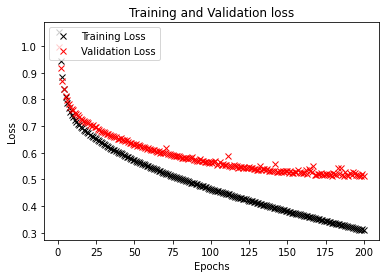

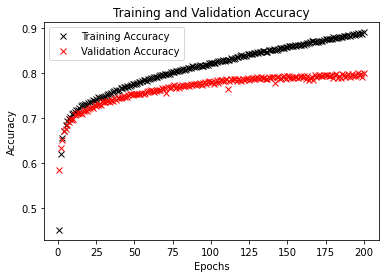

In [4]:
# Running the model
run_model()

In [5]:
# Evaluating the final model on the test set
trainX, trainY, testX, testY = load_dataset()
final_model = load_model('cifar10_model.h5')
_, acc = final_model.evaluate(testX, testY, verbose=0)

print('Accuracy = %.2f' % (acc * 100.0), '%')
print('Training subjects: %d' %trainX.shape[0])
print('Testing subjects: %d' %testX.shape[0])

Accuracy = 81.70 %
Training subjects: 15000
Testing subjects: 3000
